In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

/Users/happyelements/anaconda/envs/tensorflow/lib/python3.5/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/happyelements/anaconda/envs/tensorflow/lib/python3.5/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/happyelements/anaconda/envs/tensorflow/lib/python3.5/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Before (891, 12) (418, 11) (891, 12) (418, 11)


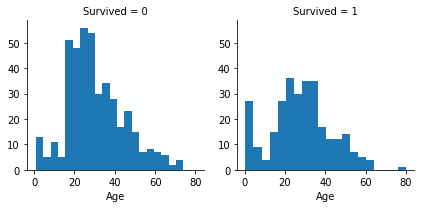

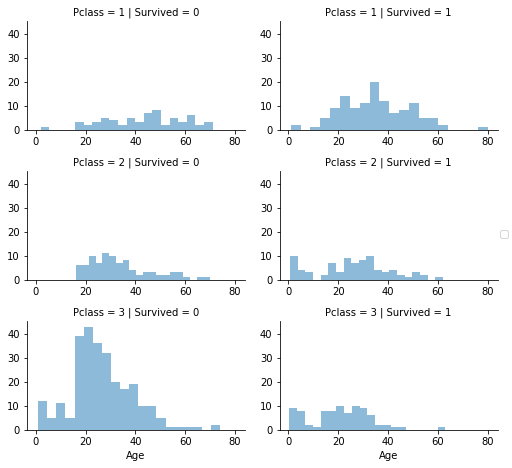

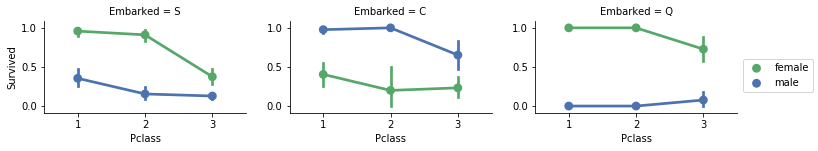

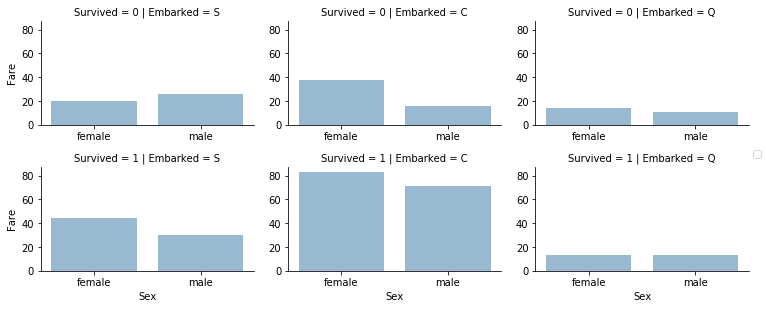

In [2]:
from CleanData import train_df,test_df

In [3]:
column_num = 8
data_len = 891
X_train = train_df.drop("Survived", axis=1).as_matrix()
# Y_train = train_df["Survived"].to_frame()
# X_train = np.zeros((data_len,column_num),dtype = np.float32)
# X_train = temp
Y_train = np.zeros((data_len,2),dtype = np.float32)
Y_train[:,0] = train_df["Survived"]
Y_train[:,1] =  1- Y_train[:,0]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape
# type(X_train),type(Y_train)
# X_train

((891, 8), (891, 2), (418, 8))

In [4]:
import tensorflow as tf
import numpy as np 
from sklearn import metrics

In [5]:
def add_layer(inputs,in_size,out_size,n_layer,activate_func = None):
    layer_name='layer%s'%n_layer
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            weights = tf.Variable(tf.random_normal([in_size,out_size]))
            tf.summary.histogram(layer_name + '/weights', weights)
        with tf.name_scope('bias'):
            biases = tf.Variable(tf.zeros([1,out_size])+0.1)
            tf.summary.histogram(layer_name + '/biases', biases) 
        with tf.name_scope('wx_plus_b'):
            wx_plus_b = tf.matmul(inputs,weights)+biases
        if activate_func is None:
            outputs =  wx_plus_b
        else:
            outputs = activate_func(wx_plus_b)
        tf.summary.histogram(layer_name + '/outputs', outputs)
        return outputs

In [6]:
with tf.name_scope('inputs'):
    X = tf.placeholder(tf.float32,shape = [None,column_num],name = "x_in" )
    y = tf.placeholder(tf.float32,shape = [None,2],name = 'y_in')

In [7]:
l1 = add_layer(X, column_num, 1024, n_layer=1, activate_func=tf.nn.relu)
l2 = add_layer(l1, 1024, 500, n_layer=2, activate_func=tf.nn.relu)
l3 = add_layer(l2, 500, 50, n_layer=3, activate_func=tf.nn.relu)

In [8]:
prediction = add_layer(l3, 50, 2, n_layer=4, activate_func=tf.nn.softmax)
# prediction = add_layer(l1, 1024, 2, n_layer=4, activate_func=tf.nn.softmax)
# prediction = 

In [9]:
with tf.name_scope('loss'):
#     loss = tf.reduce_mean(tf.reduce_sum(tf.square(y - prediction),
#                      reduction_indices=[1]))
    loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(labels=Y_train, logits=prediction))
    tf.summary.scalar('loss', loss)

In [10]:
with tf.name_scope('train_step'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [11]:
init = tf.global_variables_initializer()

In [12]:
# correct_prediction = tf.equal()

In [13]:
sess = tf.Session()
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter("logs/", sess.graph)
sess.run(init)

In [ ]:
# X_train.iloc[[1]]
# Y_train

In [ ]:
for i in range(1000):
    # training
    sess.run(train_step, feed_dict={X: X_train, y: Y_train})
    if i % 50 == 0:
        # to see the step improvement
#         print(sess.run(loss, feed_dict={X: X_train, y: Y_train}))
#         prediction_value = sess.run(prediction, feed_dict={X: X_train})
#         score = metrics.accuracy_score(Y_train, prediction_value)
#         print(prediction_value)
        rs = sess.run(merged,feed_dict={X: X_train, y: Y_train})
        writer.add_summary(rs, i)



In [ ]:
prediction_value = sess.run(prediction, feed_dict={X: X_train})
print(prediction_value)
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])
print(accuracy(prediction_value,Y_train))

In [17]:
# X_train
# Y_train